In [25]:
import pandas as pd
df = pd.read_csv(r'C:\Users\SM-PC\Desktop\2020-2\데이터분석및활용\데분활 팀 프로젝트\데분활 팀 프로젝트\boston_crime.csv')
df.index.name='record'
print(df.head)

C:\Users\SM-PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,2,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<bound method NDFrame.head of        INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  \
record                                                    
0            TESTTEST2           423                NaN   
1            S97333701          3301                NaN   
2            S47513131          2647                NaN   
3            I92102201          3301                NaN   
4            I92097173          3115                NaN   
...                ...           ...                ...   
528229        20062356          1107                NaN   
528230        20054040          3501                NaN   
528231        20046400          1501                NaN   
528232        20038446          1501                NaN   
528233        20030892           540                NaN   

                                      OFFENSE_DESCRIPTION  DISTRICT  \
record                                                                
0                                    ASSAULT - AGGRAVATED  E

In [26]:
df_dropped = df.dropna(axis=0)
print(df_dropped.head)

<bound method NDFrame.head of        INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
record                                                     
908         I192077645           413  Aggravated Assault   
909         I192077645          2662          Ballistics   
921         I192077627           413  Aggravated Assault   
2811        I192075578           413  Aggravated Assault   
3437        I192074923          1402           Vandalism   
...                ...           ...                 ...   
425000      I152051161          3125     Warrant Arrests   
425195      I152050961           413  Aggravated Assault   
425934      I152050036           413  Aggravated Assault   
425935      I152050036           413  Aggravated Assault   
425936      I152050036           413  Aggravated Assault   

                   OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
record                                                                    
908     ASSAULT - AGGRAVATED - BATTERY 

In [27]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

cats = ['STREET','DAY_OF_WEEK','UCR_PART','DAY_OF_WEEK','Location','INCIDENT_NUMBER']

#fit and transform
out_enc=enc.fit_transform(df_dropped[cats])
'''
print('identified categories: ')
print(enc.categories_)
print('encoded data: ')
print(out_enc)
'''
df_dropped[cats] = out_enc
print(df_dropped.head())
df = df_dropped

        INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
record                                                      
908               783.0           413  Aggravated Assault   
909               783.0          2662          Ballistics   
921               782.0           413  Aggravated Assault   
2811              781.0           413  Aggravated Assault   
3437              780.0          1402           Vandalism   

                   OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
record                                                                    
908     ASSAULT - AGGRAVATED - BATTERY       B2            295        Y   
909          BALLISTICS EVIDENCE/FOUND       B2            295        Y   
921     ASSAULT - AGGRAVATED - BATTERY      C11            344        Y   
2811    ASSAULT - AGGRAVATED - BATTERY       B3            457        Y   
3437                         VANDALISM       B2            326        Y   

           OCCURRED_ON_DATE  YEAR  MONTH  DAY_

<ipython-input-27-a31acc5c89c0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped[cats] = out_enc
C:\Users\SM-PC\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


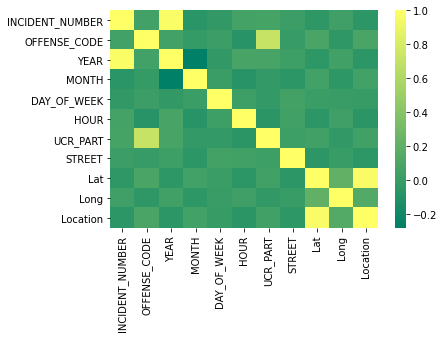

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

cor=df.corr()

sns.heatmap(cor,annot=False, cmap=plt.cm.summer)
plt.show()

In [30]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

cols=['DAY_OF_WEEK','STREET','HOUR','Location']

x=df[cols]
y=df['UCR_PART']

svc = SVC(kernel="linear", C=1)
rfe=RFE(estimator=svc,n_features_to_select=2, step=1)
rfe.fit(x,y)

print(cols)
print(rfe.ranking_)

['DAY_OF_WEEK', 'STREET', 'HOUR', 'Location']
[1 3 1 2]


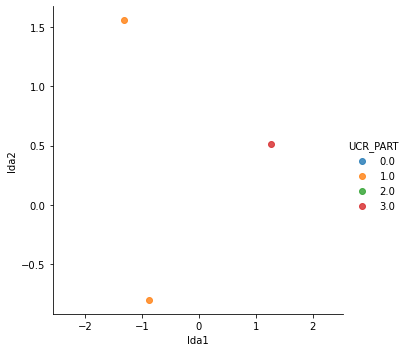

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=2)

lda.fit(df[cols],df['UCR_PART'])
out_lda = lda.transform(df[cols])

df_lda = pd.DataFrame(data=out_lda,columns=['lda1','lda2'])
df_lda = pd.concat([df_lda,df[['UCR_PART']]],axis=1)

sns.lmplot(x='lda1',y='lda2',hue='UCR_PART',data=df_lda,fit_reg=False)

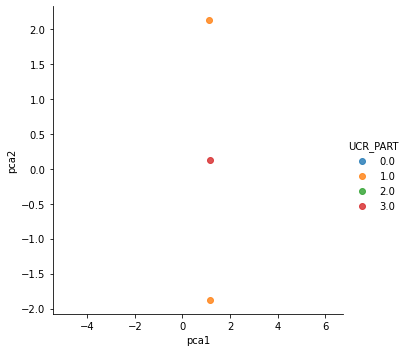

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

#fir and transform using 2 input dimensions
out_pca = pca.fit_transform(df[['DAY_OF_WEEK','MONTH']])

#out_pca = pca.fit_transform(df[cols])

#create pca output dataframe and add label column "species"
df_pca = pd.DataFrame(data=out_pca, columns=['pca1','pca2'])
df_pca = pd.concat([df_pca, df[['UCR_PART']]], axis=1)

sns.lmplot(x='pca1',y='pca2',hue='UCR_PART',data=df_pca,fit_reg=False)

AxesSubplot(0.125,0.125;0.775x0.755)


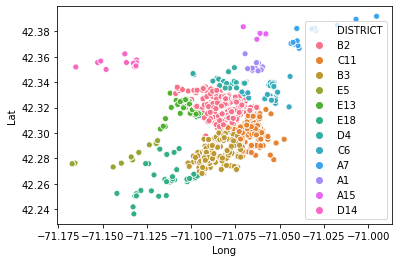

In [33]:
plot1 = sns.scatterplot(x='Long', y='Lat',hue='DISTRICT', data=df)
print(plot1)

AxesSubplot(0.125,0.125;0.775x0.755)


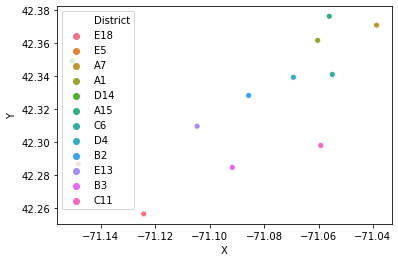

In [35]:
df_police = pd.read_csv(r'C:\Users\SM-PC\Desktop\2020-2\데이터분석및활용\데분활 팀 프로젝트\데분활진도점검4\Boston_Police_Stations.csv')

plot2 = sns.scatterplot(x='X', y='Y',hue='District', data=df_police)
print(plot2)

<ipython-input-37-0b8f1f07dd9e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['DBSCAN Cluster Labels'] = clus.labels_


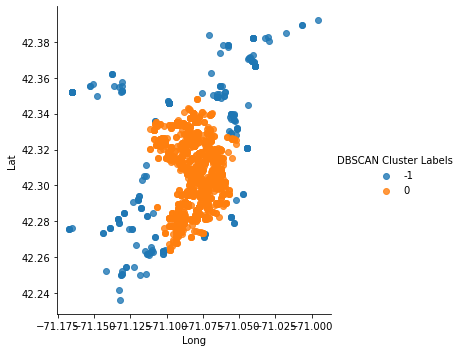

In [37]:
from sklearn.cluster import DBSCAN
clus = DBSCAN(eps=0.01, min_samples=100, metric='euclidean')
cols = ['Long','Lat']
df_loc = df[cols]
clus.fit(df_loc)

#get cluster assignment
df_loc['DBSCAN Cluster Labels'] = clus.labels_

sns.lmplot(x='Long', y='Lat', hue="DBSCAN Cluster Labels", data=df_loc, fit_reg=False)

<ipython-input-39-2229bf375fd2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['HCA Cluster Labels'] = clus.labels_


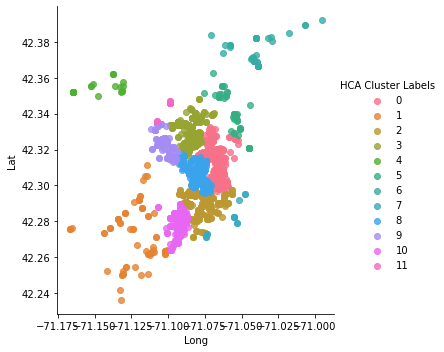

In [39]:
from sklearn.cluster import AgglomerativeClustering
clus = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')

clus.fit(df_loc)

df_loc['HCA Cluster Labels'] = clus.labels_

sns.lmplot(x='Long', y='Lat', hue="HCA Cluster Labels", data=df_loc, fit_reg=False)

In [40]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

n_clusters = [2,3,4,5,6,7,8]
for num in n_clusters:
    HCA = AgglomerativeClustering(n_clusters=num, affinity='euclidean', linkage='ward', memory='model_storage/dendrogram', compute_full_tree=True)
    cluster_labels = HCA.fit_predict(df_loc)
    S = metrics.silhouette_score(df_loc,cluster_labels)
    
    print("n_clusters = {:d}, silhouette score {:1f}".format(num,S))

n_clusters = 2, silhouette score 0.738898
n_clusters = 3, silhouette score 0.677314
n_clusters = 4, silhouette score 0.723862
n_clusters = 5, silhouette score 0.728706
n_clusters = 6, silhouette score 0.780805
n_clusters = 7, silhouette score 0.856704
n_clusters = 8, silhouette score 0.927136


In [42]:
#df_police = df_police.dropna(axis=0)
df_police.index.name='record'

cols_p = ['X','Y']
police_location = df_police[cols_p]
police_location

,X,Y
record,,
0,-71.124269,42.256482
1,-71.148368,42.286786
2,-71.038676,42.371058
3,-71.060307,42.361825
4,-71.150578,42.349395
5,-71.056047,42.376467
6,-71.054936,42.341164
7,-71.069240,42.339440
8,-71.090748,42.334192


In [43]:
df.index.name='record'
df = df.dropna(axis=0)

cols = ['Long','Lat']
location = df[cols]
location

,Long,Lat
record,,
908,-71.084830,42.324098
909,-71.084830,42.324098
921,-71.068699,42.300980
2811,-71.083369,42.300068
3437,-71.078719,42.311955
...,...,...
425000,-71.066850,42.317808
425195,-71.085543,42.333584
425934,-71.076256,42.311611


In [44]:
import numpy as np

#police_location.loc[[0],['Y']]
density_list=[]

for i in range(0,len(df_police)):
    latitude =police_location.iloc[i].values[1]
    longitude =police_location.iloc[i].values[0]
    
    #print(latitude)
    
    latitude_range = (df['Lat']>latitude-0.01) & (df['Lat']<=latitude+0.01)
    longitude_range = (df['Long']>longitude-0.015) & (df['Long']<=longitude+0.015)
    
    total = df[latitude_range & longitude_range]
    density_list.append(len(total))
    
#print(density_list)

police_location['Density'] = density_list
print(police_location)
print("median: "+str(police_location['Density'].median()))
print("mean: "+str(police_location['Density'].mean()))

                X          Y  Density
record                               
0      -71.124269  42.256482       19
1      -71.148368  42.286786        4
2      -71.038676  42.371058       22
3      -71.060307  42.361825        7
4      -71.150578  42.349395       19
5      -71.056047  42.376467       17
6      -71.054936  42.341164       39
7      -71.069240  42.339440      101
8      -71.090748  42.334192      235
9      -71.085684  42.328385      313
10     -71.104639  42.309722       82
11     -71.091702  42.284729      235
12     -71.059165  42.298065      161
median: 39.0
mean: 96.46153846153847


<ipython-input-44-f3e60ba4b088>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  police_location['Density'] = density_list


In [45]:
density_list_df =[]

for i in range(0,len(df)):
    latitude =location.iloc[i].values[1]
    longitude =location.iloc[i].values[0]
    
    #print(latitude)
    
    latitude_range = (df['Lat']>latitude-0.01) & (df['Lat']<=latitude+0.01)
    longitude_range = (df['Long']>longitude-0.015) & (df['Long']<=longitude+0.015)
    
    total = df[latitude_range & longitude_range]
    density_list_df.append(len(total))
    
location['Density'] = density_list_df
print(location)

             Long        Lat  Density
record                               
908    -71.084830  42.324098      362
909    -71.084830  42.324098      362
921    -71.068699  42.300980      309
2811   -71.083369  42.300068      280
3437   -71.078719  42.311955      462
...           ...        ...      ...
425000 -71.066850  42.317808      325
425195 -71.085543  42.333584      234
425934 -71.076256  42.311611      494
425935 -71.076256  42.311611      494
425936 -71.076256  42.311611      494

[1664 rows x 3 columns]


<ipython-input-45-247ecdbd14c7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location['Density'] = density_list_df


In [46]:
density_rate = location['Density']>(police_location['Density'].mean())
print(location[density_rate])

             Long        Lat  Density
record                               
908    -71.084830  42.324098      362
909    -71.084830  42.324098      362
921    -71.068699  42.300980      309
2811   -71.083369  42.300068      280
3437   -71.078719  42.311955      462
...           ...        ...      ...
425000 -71.066850  42.317808      325
425195 -71.085543  42.333584      234
425934 -71.076256  42.311611      494
425935 -71.076256  42.311611      494
425936 -71.076256  42.311611      494

[1393 rows x 3 columns]


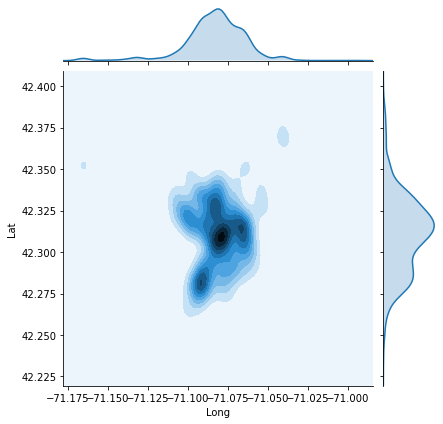

In [47]:
sns.jointplot(x='Long', y='Lat', data=location, kind='kde')

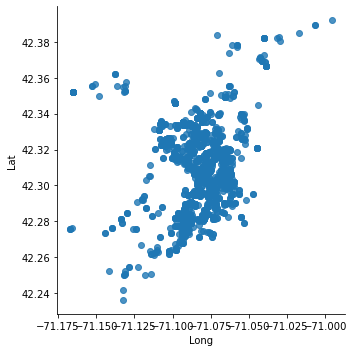

In [48]:
sns.lmplot(x='Long', y='Lat', data=location,fit_reg=False)

In [49]:
import math

for i in range(0,len(police_location)):
    pLatitude =float(police_location.iloc[i].values[1])
    pLongitude =float(police_location.iloc[i].values[0])
    
    #print(len(location[density_rate]))
    
    for j in range(0,len(location[density_rate])):
        llatitude =float(location[density_rate].iloc[j].values[1])
        llongitude =float(location[density_rate].iloc[j].values[0])
        
        distance = math.sqrt((pLatitude-llatitude)*(pLatitude-llatitude) + (pLongitude-llongitude)*(pLongitude-llongitude))
        
        if(distance<math.sqrt(( 0.02*0.02 )+( 0.03*0.03 ))):
           new_police_loc = location[density_rate].drop(location[density_rate].index[j])

print(new_police_loc)            
        

             Long        Lat  Density
record                               
908    -71.084830  42.324098      362
909    -71.084830  42.324098      362
921    -71.068699  42.300980      309
2811   -71.083369  42.300068      280
3437   -71.078719  42.311955      462
...           ...        ...      ...
424999 -71.066850  42.317808      325
425000 -71.066850  42.317808      325
425195 -71.085543  42.333584      234
425934 -71.076256  42.311611      494
425935 -71.076256  42.311611      494

[1392 rows x 3 columns]


<ipython-input-50-3d6080ed31e7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location['K-Means Cluster Labels'] = clus.labels_


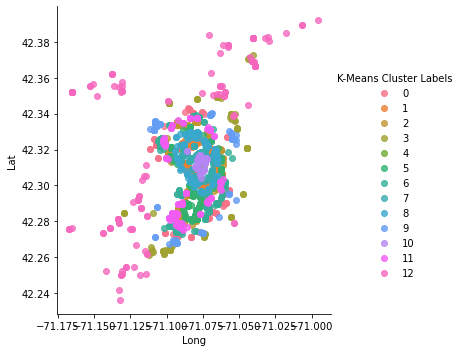

In [50]:
from sklearn.cluster import KMeans
clus = KMeans(n_clusters=13, tol=0.004, max_iter=100)

#fit to input data
clus.fit(location)
location['K-Means Cluster Labels'] = clus.labels_

sns.lmplot(x='Long', y='Lat', hue="K-Means Cluster Labels", data=location, fit_reg=False)

In [60]:
import math
point = police_location
#print(point) #경찰서 위치
cluster_point=[]

for i in range (0,13):
    x = clus.cluster_centers_[i,0]
    y = clus.cluster_centers_[i,1]
    points = [x,y]
    cluster_point.append(points)
    
#print(cluster_point) # 클러스터 중심 위치
#print(len(cluster_point))

def pointLength(x1,y1,x2,y2):
    a = x1 - x2
    b = y1 - y2
    
    c = math.sqrt((a * a) + (b * b))
    
    return c

for i in range (0,len(cluster_point)):
    minX = 0
    minY = 0
    min_lenght = 1
    
    for j in range(0,len(point)):
        print(point[i][0])
        length = pointLength(point[i][0],point[i][1],cluster_point[j][0],cluster_point[j][1])
        if length<min_lenght:
            min_lenght = length
            minX = point[j][0]
            minY = point[j][1]
    print("\n{}.클러스터 중심좌표 ({},{}) 에 대한 최소 거리 좌표: ({},{})".format(i+1,cluster_point[i][0],cluster_point[i][1],minX,minY))
    print("최소 거리: {}".format(min_lenght))    
    

KeyError: 0